1725 454 0
Inizio disegno plot
Point 1725,454 to 1725,454


/home/medlar/Documents/MouseTracker/utils/plotter.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2,y2, time2 = row[1], row[2], row[0]


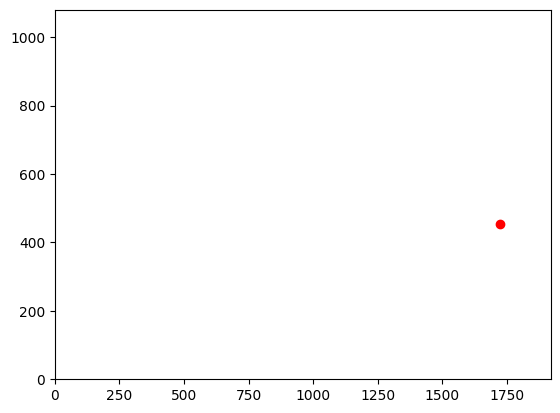

Point 1725,454 to 1725,454
Point 1725,454 to 1725,454
Point 1725,454 to 1723,454
Point 1723,454 to 1722,454
Point 1722,454 to 1721,456
Point 1721,456 to 1719,456
Point 1719,456 to 1718,456
Point 1718,456 to 1717,456
Point 1717,456 to 1715,456
Point 1715,456 to 1714,456
Point 1714,456 to 1713,456
Point 1713,456 to 1711,456
Point 1711,456 to 1710,456
Point 1710,456 to 1709,456
Point 1709,456 to 1707,456
Point 1707,456 to 1706,457
Point 1706,457 to 1704,457
Point 1704,457 to 1702,457
Point 1702,457 to 1701,457
Point 1701,457 to 1700,457
Point 1700,457 to 1698,457
Point 1698,457 to 1696,457
Point 1696,457 to 1695,457
Point 1695,457 to 1693,457
Point 1693,457 to 1689,459
Point 1689,459 to 1688,459
Point 1688,459 to 1686,459
Point 1686,459 to 1684,459
Point 1684,459 to 1683,459
Point 1683,459 to 1681,459
Point 1681,459 to 1679,461
Point 1679,461 to 1677,461
Point 1677,461 to 1675,461
Point 1675,461 to 1672,461
Point 1672,461 to 1670,463
Point 1670,463 to 1668,463
Point 1668,463 to 1666,463
P

In [5]:
import os, glob
import csv
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
import utils.plotter
sns.set()

In [2]:
class MyRnn(nn.Module):
  def __init__(self, in_d=2, out_d=2, hidden_d=4, num_hidden=1):
    super(MyRnn, self).__init__()
    self.rnn = nn.RNN(input_size=in_d, hidden_size=hidden_d, num_layers=num_hidden)
    self.fc = nn.Linear(hidden_d, out_d)

  def forward(self, x, h0):
    r, h = self.rnn(x, h0)
    y = self.fc(r)  # no activation on the output
    return y, h

In [3]:
data = []
with open('aim_data/sample1.txt') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        x = float(row[1])
        y = float(row[2])
        data.append([x,y])
print(data)
tensor = torch.FloatTensor(data)[:,None,:]

[[1136.0, 771.0], [1136.0, 770.0], [1136.0, 769.0], [1136.0, 768.0], [1136.0, 766.0], [1136.0, 765.0], [1136.0, 764.0], [1136.0, 763.0], [1136.0, 762.0], [1136.0, 761.0], [1136.0, 760.0], [1136.0, 759.0], [1136.0, 758.0], [1136.0, 757.0], [1136.0, 756.0], [1136.0, 755.0], [1136.0, 754.0], [1136.0, 753.0], [1136.0, 752.0], [1136.0, 751.0], [1136.0, 750.0], [1134.0, 750.0], [1134.0, 749.0], [1134.0, 748.0], [1134.0, 747.0], [1133.0, 747.0], [1133.0, 747.0], [1133.0, 746.0], [1132.0, 745.0], [1132.0, 744.0], [1132.0, 743.0], [1131.0, 743.0], [1131.0, 742.0], [1131.0, 740.0], [1131.0, 739.0], [1131.0, 738.0], [1131.0, 737.0], [1130.0, 737.0], [1130.0, 736.0], [1130.0, 735.0], [1130.0, 734.0], [1130.0, 733.0], [1130.0, 732.0], [1130.0, 731.0], [1130.0, 730.0], [1130.0, 729.0], [1130.0, 728.0], [1130.0, 727.0], [1129.0, 727.0], [1129.0, 726.0], [1129.0, 725.0], [1129.0, 724.0], [1129.0, 723.0], [1129.0, 722.0], [1129.0, 721.0], [1129.0, 720.0], [1129.0, 719.0], [1128.0, 719.0], [1128.0, 718.

In [4]:
folder = "aim_data"

file_paths = glob.glob(folder + '/*')

def numbers(s):
    return int(s.split(".")[0][15:])

file_paths.sort(key=numbers) # for testing purposes

testing = False
sequences = []
for file_path in file_paths:
    if file_path == "aim_data/sample1.txt" and testing:
        primo = True
    else:
        primo = False
    
    data = []
    with open(file_path) as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            if primo:
                print(row)
            x = float(row[1])
            y = float(row[2])
            data.append([x,y])
    
    normX, normY = data[0][0], data[0][1]
    data = [[i[0]-normX, i[1]-normY] for i in data]

    tensor = torch.FloatTensor(data)[:,None,:]
    sequences.append(tensor)

data = torch.cat(sequences, dim=0)
mu = data.mean(dim=0)
std = data.std(dim=0)

seq = []
for tensor in sequences:
    seq.append((tensor-mu)/std)


################################################

prova1 = sequences[0].tolist()
prova1 = [[int(j) for j in i[0]] for i in prova1]
# print(prova1)
# print(seq[0])
prova = ((seq[0]*std)+mu).tolist()
prova = [[int(j) for j in i[0]] for i in prova]
# print(prova)

counter = 0
for p, p1 in zip(prova, prova1):
    if p == p1:
        counter += 1 
    else:
        print(p,p1)

print(seq)

[0, -2] [0, -3]
[-11, -67] [-11, -68]
[-11, -70] [-11, -71]
[-11, -73] [-11, -74]
[-11, -76] [-11, -77]
[-13, -76] [-13, -77]
[-13, -79] [-13, -80]
[-13, -79] [-13, -80]
[tensor([[[ 0.0566, -0.0692]],

        [[ 0.0566, -0.0758]],

        [[ 0.0566, -0.0823]],

        [[ 0.0566, -0.0889]],

        [[ 0.0566, -0.1020]],

        [[ 0.0566, -0.1085]],

        [[ 0.0566, -0.1151]],

        [[ 0.0566, -0.1216]],

        [[ 0.0566, -0.1282]],

        [[ 0.0566, -0.1347]],

        [[ 0.0566, -0.1413]],

        [[ 0.0566, -0.1478]],

        [[ 0.0566, -0.1544]],

        [[ 0.0566, -0.1609]],

        [[ 0.0566, -0.1675]],

        [[ 0.0566, -0.1740]],

        [[ 0.0566, -0.1806]],

        [[ 0.0566, -0.1871]],

        [[ 0.0566, -0.1937]],

        [[ 0.0566, -0.2002]],

        [[ 0.0566, -0.2068]],

        [[ 0.0503, -0.2068]],

        [[ 0.0503, -0.2133]],

        [[ 0.0503, -0.2199]],

        [[ 0.0503, -0.2264]],

        [[ 0.0471, -0.2264]],

        [[ 0.0471, -0.2

In [15]:
def custom_loss(pred, actual, destination):
    sqr_diff = torch.pow(pred - actual, 2)
    mean_sqr_diff = torch.mean(sqr_diff)
    return mean_sqr_diff
    


In [ ]:
print(seq[0][:-1, ...])

In [7]:
print(seq[0][:-1, ...].shape)

torch.Size([89, 1, 2])


100%|██████████| 100/100 [00:46<00:00,  2.14it/s]


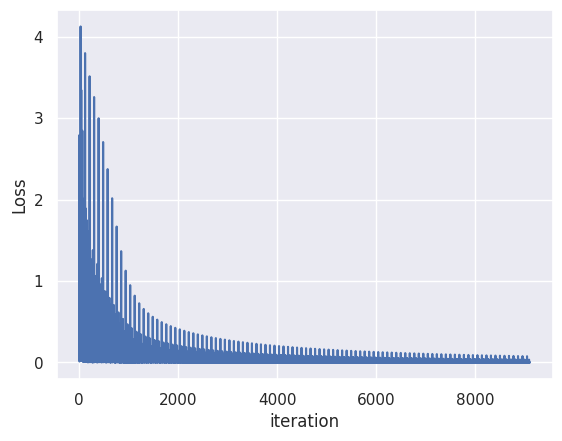

In [17]:
in_d = 2
out_d = in_d
hidden_d = 8
num_hidden = 1
rnn = MyRnn(in_d, out_d, hidden_d, num_hidden)
loss = []
criterion = custom_loss
# criterion = nn.MSELoss()
opt = torch.optim.SGD(rnn.parameters(), lr=0.005)
n_epochs = 100
for e in trange(n_epochs):
  for s in seq:
    arrival = s[-1:, ...] # destination point
    pred, _ = rnn(s[:-1,...], torch.zeros(num_hidden, 1, hidden_d, dtype=torch.float))  # predict next step, init hidden state to zero at the begining of the sequence
    err = criterion(pred, s[1:, ...], arrival)  # predict next step for each step
    opt.zero_grad()
    err.backward()
    opt.step()
    loss.append(err.item())
plt.plot(loss)
plt.ylabel('Loss')
plt.xlabel('iteration')
plt.show()

In [18]:
rnn.eval()
with torch.no_grad():
  k = 80
  for si, s in enumerate(seq):
    pred, h = rnn(s[:k,...], torch.zeros(num_hidden, 1, hidden_d, dtype=torch.float))  # given first k steps predict the next one
    print('seq {}, prev = {}  -> predicted {}th step = {}, actual step = {}'.format(si, s[k-1,...]*std+mu, k, pred[-1, ...]*std + mu, s[k, ...]*std+mu))
    prev = (torch.round(pred[-1:, ...]*std + mu) - mu) / std  # round the prediction, attmepting to avoid accumulation of error
    # continue to predict 
    for j in  range(k+1, s.shape[0]):
      pred, h = rnn(prev, h)
      print('\t\tpredicted step {} (prev = {}) = {}, actual step = {}'.format(j, prev*std+mu, pred[-1,...]*std+mu, s[j, ...]*std + mu))
      prev = (torch.round(pred*std + mu) - mu) / std
  print('\n')

seq 0, prev = tensor([[-11., -72.]])  -> predicted 80th step = tensor([[  0.0796, -78.2844]]), actual step = tensor([[-11., -73.]])
		predicted step 81 (prev = tensor([[[  0., -78.]]])) = tensor([[  9.4023, -86.8671]]), actual step = tensor([[-11.0000, -74.0000]])
		predicted step 82 (prev = tensor([[[  9.0000, -87.0000]]])) = tensor([[ 18.2583, -97.6928]]), actual step = tensor([[-11., -75.]])
		predicted step 83 (prev = tensor([[[ 18.0000, -98.0000]]])) = tensor([[  26.7796, -110.2341]]), actual step = tensor([[-11., -76.]])
		predicted step 84 (prev = tensor([[[  27.0000, -110.0000]]])) = tensor([[  35.1761, -123.4239]]), actual step = tensor([[-11.0000, -77.0000]])
		predicted step 85 (prev = tensor([[[  35.0000, -123.0000]]])) = tensor([[  42.9910, -137.0757]]), actual step = tensor([[-13.0000, -77.0000]])
		predicted step 86 (prev = tensor([[[  43., -137.]]])) = tensor([[  50.7197, -151.5795]]), actual step = tensor([[-13., -78.]])
		predicted step 87 (prev = tensor([[[  51.0000,

IndexError: index 79 is out of bounds for dimension 0 with size 46

In [32]:
len(sequences[0:1])

1

In [36]:
with torch.no_grad():
  coord = []
  k = 5 
  for si, s in enumerate(sequences):
    
    if si == 0:
      pred, h = rnn(s[:k,...], torch.zeros(num_hidden, 1, hidden_d, dtype=torch.float))  # given first k steps predict the next one
      coord.append(pred[-1, ...]*sig + mu)
      print('seq {}, prev = {}  -> predicted {}th step = {}, actual step = {}'.format(si, s[k-1,...]*sig+mu, k, pred[-1, ...]*sig + mu, s[k, ...]*sig+mu))
      prev = (torch.round(pred[-1:, ...]*sig + mu) - mu) / sig  # round the prediction, attmepting to avoid accumulation of error
      # continue to predict 
      for j in  range(k+1, s.shape[0]):
        pred, h = rnn(prev, h)
        coord.append(pred[-1, ...]*sig + mu)
        print('\t\tpredicted step {} (prev = {}) = {}, actual step = {}'.format(j, prev*sig+mu, pred[-1,...]*sig+mu, s[j, ...]*sig + mu))
        prev = (torch.round(pred*sig + mu) - mu) / sig
  print('\n')

coord = [x.tolist()[0] for x in coord]
plotter.mousePlotWithList(coord)

NameError: name 'sig' is not defined